In [1]:
%run InitialDataCleanup_Ratawfiq16042021.ipynb
IPython.display.clear_output()

In [2]:
df = result
print(df.shape)
df.tail()

(327, 34)


,initclaims_count_regular,contclaims_count_regular,initclaims_count_combined,contclaims_count_combined,contclaims_count_pua,bg_posts_ss60,bg_posts_ss70,bg_posts_ss30,bg_posts_ss55,bg_posts_ss65,...,spend_acf,spend_hcs,spend_aer,spend_apg,spend_grf,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_transit_stations,gps_workplaces,gps_away_from_home
2021-01-23,18446.000000,188217.000000,18505.000000,678817.000000,252249.000000,-0.280286,-0.324857,-0.115014,-0.166157,-0.1788,...,-0.305,-0.0186,-0.282,0.1070,0.000997,-0.316,-0.150,-0.374,-0.276,-0.135
2021-01-24,18468.142857,190991.142857,18574.571429,649241.571429,238743.428571,-0.251571,-0.294714,-0.105029,-0.143314,-0.1616,...,-0.262,-0.0350,-0.194,0.1220,0.037900,-0.324,-0.154,-0.376,-0.274,-0.135
2021-01-25,18490.285714,193765.285714,18644.142857,619666.142857,225237.857143,-0.222857,-0.264571,-0.095043,-0.120471,-0.1444,...,-0.240,0.0133,-0.163,0.1420,0.073100,-0.327,-0.150,-0.371,-0.259,-0.129
2021-01-26,18512.428571,196539.428571,18713.714286,590090.714286,211732.285714,-0.194143,-0.234429,-0.085057,-0.097629,-0.1272,...,-0.298,-0.0455,-0.238,0.0622,-0.023100,-0.341,-0.167,-0.379,-0.264,-0.134
2021-01-27,18534.571429,199313.571429,18783.285714,560515.285714,198226.714286,-0.165429,-0.204286,-0.075071,-0.074786,-0.1100,...,-0.282,-0.0118,-0.212,0.0821,-0.043400,-0.336,-0.159,-0.376,-0.263,-0.132


# The highly correlated features columns has been droppped; And the likely feature indicators retained


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 327 entries, 2020-03-07 to 2021-01-27
Freq: D
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   initclaims_count_regular   327 non-null    float64
 1   contclaims_count_regular   327 non-null    float64
 2   initclaims_count_combined  327 non-null    float64
 3   contclaims_count_combined  327 non-null    float64
 4   contclaims_count_pua       327 non-null    float64
 5   bg_posts_ss60              327 non-null    float64
 6   bg_posts_ss70              327 non-null    float64
 7   bg_posts_ss30              327 non-null    float64
 8   bg_posts_ss55              327 non-null    float64
 9   bg_posts_ss65              327 non-null    float64
 10  case_count                 327 non-null    float64
 11  death_count                327 non-null    float64
 12  test_count                 327 non-null    float64
 13  vaccine_count          

In [4]:
#target_names = ['contclaims_count_regular']
target_names = list(df.columns)

In [5]:
split_fraction = 0.7
train_split = int(split_fraction * int(df.shape[0]))
step = 1

past = 20
future = 1
learning_rate = 0.001
batch_size = 12

sequence_length = int(past / step)

In [6]:
titles = list(df.columns)
features = df[titles]
features.head()

,initclaims_count_regular,contclaims_count_regular,initclaims_count_combined,contclaims_count_combined,contclaims_count_pua,bg_posts_ss60,bg_posts_ss70,bg_posts_ss30,bg_posts_ss55,bg_posts_ss65,...,spend_acf,spend_hcs,spend_aer,spend_apg,spend_grf,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_transit_stations,gps_workplaces,gps_away_from_home
2020-03-07,5150.000000,77661.0,5150.000000,77661.0,0.0,0.072643,0.0837,0.0618,0.056691,0.033943,...,-0.03040,-0.02080,-0.01440,-0.06010,0.0626,0.1070,0.0471,0.1070,0.0257,0.0156
2020-03-08,5176.857143,77389.0,5176.857143,77389.0,0.0,0.063086,0.0714,0.0439,0.048283,0.022986,...,-0.02830,0.00586,0.00590,-0.02870,0.0817,0.1070,0.0486,0.0943,0.0257,0.0156
2020-03-09,5203.714286,77117.0,5203.714286,77117.0,0.0,0.053529,0.0591,0.0260,0.039874,0.012029,...,-0.02430,-0.04010,-0.01700,-0.03070,0.1030,0.1030,0.0486,0.0914,0.0257,0.0139
2020-03-10,5230.571429,76845.0,5230.571429,76845.0,0.0,0.043971,0.0468,0.0081,0.031466,0.001071,...,-0.00913,0.18600,-0.00624,-0.00236,0.1480,0.1010,0.0457,0.0871,0.0229,0.0125
2020-03-11,5257.428571,76573.0,5257.428571,76573.0,0.0,0.034414,0.0345,-0.0098,0.023057,-0.009886,...,-0.01250,0.15600,-0.03670,-0.01600,0.2060,0.0957,0.0586,0.0800,0.0229,0.0109


In [7]:
start = past + future
end = start + train_split

x_data = features.values[0: -start]
y_data = features[target_names].values[start:]

x_train = x_data[:train_split]
x_val = x_data[train_split:]

y_train = y_data[:train_split]
y_val = y_data[train_split:]

x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_val_scaled = x_scaler.transform(x_val)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_val_scaled = y_scaler.transform(y_val)

len(x_train) + len(x_val), len(y_train) + len(y_val), len(features)

(306, 306, 327)

In [2]:
#dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train_scaled,
    y_train_scaled,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [12]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val_scaled,
    y_val_scaled,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [13]:
for batch in dataset_train.take(1):
    inputs, targets = batch
print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

print('dataset val')
i = 0
for j in dataset_val:
    x, y = j
    print('x shape:', x.shape)
    print('y shape:', y.shape)
    i = i + 1

print(f'length of x_val: {len(x_val)}')
print(f'length of validation data: {len(dataset_val)}')
print(f'number of batches: {i}')

Input shape: (12, 20, 19)
Target shape: (12, 19)
dataset val
x shape: (12, 20, 19)
y shape: (12, 19)
x shape: (12, 20, 19)
y shape: (12, 19)
x shape: (12, 20, 19)
y shape: (12, 19)
x shape: (12, 20, 19)
y shape: (12, 19)
x shape: (11, 20, 19)
y shape: (11, 19)
length of x_val: 78
length of validation data: 5
number of batches: 5


# Tuning some hyperparameter and the model layer with some function like relu, sigmoid, tanh, ELUs and softmax.

**From testing experience here and literature research, combination of sigmoid and adam seems best.**

In [14]:
model = tf.keras.Sequential([
    keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2])),
    keras.layers.LSTM(128, activation='tanh'),
    keras.layers.Dense(len(target_names))
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               75776     
_________________________________________________________________
dense (Dense)                (None, 19)                2451      
Total params: 78,227
Trainable params: 78,227
Non-trainable params: 0
_________________________________________________________________


In [15]:

%load_ext tensorboard
import os
import shutil
from datetime import datetime

path_checkpoint = "covid_model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

epochs = 20

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

if os.path.exists('./logs'):
    shutil.rmtree('./logs/')
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback, tensorboard_callback],
)

Epoch 1/20
18/18 [==============================] - 4s 89ms/step - loss: 0.1360 - val_loss: 0.1825

Epoch 00001: val_loss improved from inf to 0.18254, saving model to covid_model_checkpoint.h5
Epoch 2/20
18/18 [==============================] - 0s 24ms/step - loss: 0.1029 - val_loss: 0.2221

Epoch 00002: val_loss did not improve from 0.18254
Epoch 3/20
18/18 [==============================] - 0s 25ms/step - loss: 0.0440 - val_loss: 0.1862

Epoch 00003: val_loss did not improve from 0.18254
Epoch 4/20
18/18 [==============================] - 0s 26ms/step - loss: 0.0332 - val_loss: 0.1789

Epoch 00004: val_loss improved from 0.18254 to 0.17892, saving model to covid_model_checkpoint.h5
Epoch 5/20
18/18 [==============================] - 1s 29ms/step - loss: 0.0256 - val_loss: 0.1734

Epoch 00005: val_loss improved from 0.17892 to 0.17336, saving model to covid_model_checkpoint.h5
Epoch 6/20
18/18 [==============================] - 0s 27ms/step - loss: 0.0176 - val_loss: 0.1625

Epoch 00

## Visualization of the training and validation loss

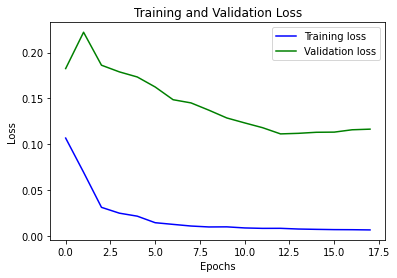

In [16]:
# defining a function to visualise the training and validation loss
def visualising_loss(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.figure()
  plt.plot(epochs, loss, 'blue', label = 'Training loss')
  plt.plot(epochs, val_loss, 'green', label = 'Validation loss')
  plt.title(title)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

visualising_loss(history, 'Training and Validation Loss')

In [17]:
result = model.evaluate(x=np.expand_dims(x_val_scaled[-past:], axis=0),
                        y=np.expand_dims(y_val_scaled[-past:], axis=0))

1/1 [==============================] - 0s 458ms/step - loss: 0.1821


In [18]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 2) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return

Prediction: [ 3.97448120e+03  1.83751156e+05  4.76201688e+05 -3.45349014e-01
 -1.58409625e-01 -1.24164984e-01  1.69240359e+05  7.67547363e+03
 -1.12897076e-01 -2.02173591e-01 -7.59994462e-02 -1.24221154e-01
 -2.14251935e-01 -4.05232370e-01 -6.46768436e-02  8.58193040e-02
 -9.20003876e-02 -2.59719789e-01 -2.24556297e-01]


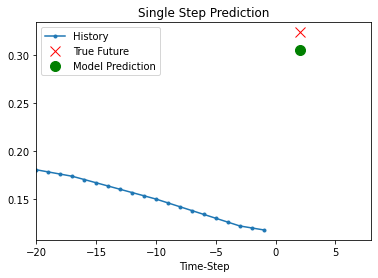

Prediction: [ 6.17927588e+03  1.70809203e+05  5.32477125e+05 -4.17153209e-01
 -1.63474634e-01 -1.90405890e-01  1.92004062e+05  7.90922070e+03
 -9.30621624e-02 -2.50531524e-01 -7.74148554e-02 -9.97154191e-02
 -2.35255733e-01 -4.31745410e-01 -1.00687392e-01  1.20403275e-01
 -1.28583282e-01 -3.25329840e-01 -2.24728733e-01]


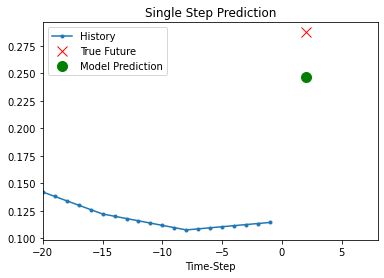

In [19]:
for x, y in dataset_val.take(2):
    #print('Y:', y_scaler.inverse_transform(y)[0])
    prediction = model.predict(x)
    #print('pred shape:', prediction.shape)
    print('Prediction:', y_scaler.inverse_transform(prediction)[0])
    show_plot(
        [x[0][:, 1].numpy(), y[0][3].numpy(), prediction[0][3]],
        2,
        "Single Step Prediction",
    )

In [21]:
DAYS_TO_PREDICT = 30

features_pred = df[-20:].to_numpy()
last_df = df[-1:]
pre_covid_ui_claims = 72103
print(f'pre-covid UI claims {pre_covid_ui_claims}')
num_of_days = 0
last_date = df[-1:].index.date[0]
print('last date in the dataset:', last_date)
print(f'UI claims on the last day {last_date}: {df[-1:]["contclaims_count_regular"]}')
preds = []
for i in range(DAYS_TO_PREDICT):
    x_pred_scaled = x_scaler.transform(features_pred)
    dataset_pred = keras.preprocessing.timeseries_dataset_from_array(
        x_pred_scaled,
        None,
        sequence_length=sequence_length,
        sampling_rate=step,
        batch_size=batch_size,
    )

    for batch in dataset_pred.take(1):
        x = batch
    pred = model.predict(x)
    preds.append(pred[0])
    num_of_days = num_of_days + 1
    pred_ui_claims = y_scaler.inverse_transform(pred)[0][3]
    if (pred_ui_claims <= pre_covid_ui_claims):
        print(f'predicted UI claims {pred_ui_claims} is less than or equal to pre-covid level {pre_covid_ui_claims} after {num_of_days} days')
        break
    else:
        print(f'predicted value {pred_ui_claims} not meeting the threshold after {num_of_days} days')
    pred_actual = y_scaler.inverse_transform(pred)
    features_pred  = np.vstack([features_pred, pred_actual])
    features_pred = features_pred[1:]

print('Done...')

pre-covid UI claims 72103
last date in the dataset: 2021-01-27
UI claims on the last day 2021-01-27: 2021-01-27    199313.571429
Name: contclaims_count_regular, dtype: float64
predicted UI claims -0.2868276834487915 is less than or equal to pre-covid level 72103 after 1 days
Done...


In [ ]:
predicted_ui_claims = y_scaler.inverse_transform(preds)

pred_arr = []
for i in range(len(predicted_ui_claims)):
    pred_arr.append(predicted_ui_claims[i][3])
    
predicted_index = pd.date_range(
  start=df.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)

predicted_ui = pd.Series(
  data=pred_arr,
  index=predicted_index
)

In [ ]:
selected_cols=['contclaims_count_regular']
ui_claims_feb = prepare_data('UI Claims - State - Weekly.csv', day='day_endofweek', start_date='2021-01-30', end_date='2021-02-27', selected_cols=selected_cols, interpolate=True)
ui_claims_feb = ui_claims_feb[1:]
ui_claims_feb.head()

In [ ]:
predicted_ui.head()

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(8,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.plot(ui_claims_feb, label='Feb actual UI Claims')
plt.plot(predicted_ui, label='Feb predicted UI Claims')
plt.legend()